# **Experiment Notebook**



<hr>

## A. Project


In [ ]:
student_name = 'Shashikanth Senthil Kumar'

In [ ]:
student_id = '25218722'

In [ ]:
experiment_id = '1'

<hr>

## B. Experiment Description


In [ ]:
experiment_hypothesis = '* The hypothesis for this experiment is that including the intercept term (fit_intercept=True) in a Multivariate Linear Regression model will result in better predictive performance compared to a model without the intercept term (fit_intercept=False). \n\nThis is based on the premise that the intercept term allows the model to better fit the data by adjusting the baseline value of the target variable, potentially improving the accuracy of the predictions.'

In [ ]:
experiment_expectations = '* Performance Improvement: We expect that the model with fit_intercept=True will demonstrate lower Root Mean Squared Error (RMSE) values on both the training and validation datasets compared to the model with fit_intercept=False. This should indicate better model performance and more accurate predictions.\n* Consistent Results: The performance improvement should be evident across all datasets (training, validation, and test). If the hypothesis holds, the fit_intercept=True model should consistently show better results.\n* Business Relevance: The improved model performance should translate into more reliable predictions, providing better insights and aiding in more informed decision-making processes in the business context.'

<hr>

## C. Data Understanding


### C.0 Import Packages

In [ ]:
# Pandas for data handling
import pandas as pd

# Scikit Learn for ML training
import sklearn

# Altair for plotting
import altair as alt

# NumPy for numerical computations
import numpy as np

# Matplotlib for basic plotting
import matplotlib.pyplot as plt

# Ensures that Matplotlib plots are displayed inline in the notebook
%matplotlib inline

# Seaborn for statistical data visualization
import seaborn as sns


# Warnings module to suppress unwanted warnings
import warnings

# Suppress future warnings to make the output cleaner
warnings.simplefilter(action='ignore', category=FutureWarning)

<hr>

### C.1   Load Datasets

In [ ]:
# Load training set
# Do not change this code

X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

In [ ]:
# Load validation set
# Do not change this code

X_val = pd.read_csv('X_val.csv')
y_val = pd.read_csv('y_val.csv')

In [ ]:
# Load testing set
# Do not change this code

X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

<hr>

<hr>

## D. Feature Selection


In [ ]:
feature_selection_executive_summary = 'Use the same list of features from experiment 0.'

In [ ]:
# List of features selected for further analysis or modeling
features_list = ['10percentage', '12percentage','Degree', 'Specialization', 'collegeGPA', 
                 'English', 'Logical', 'Quant', 'Domain','ComputerProgramming', 'ElectronicsAndSemicon',
                 'ComputerScience','MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg','conscientiousness',
                 'agreeableness', 'extraversion', 'nueroticism','openess_to_experience', 'Salary']

In [ ]:
#Final Features after Feature Engineering
features_list = ['10percentage', '12percentage', 'Degree', 'Specialization','collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience','MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism','openess_to_experience', 'Salary', 'GPA_Quant_Interaction',
       '10_12_Percentage_Interaction', 'GPA_Category']

<hr>

## E. Train Machine Learning Model

In [ ]:
train_model_executive_summary = 'In this experiment, we tested the impact of the fit_intercept hyperparameter in a Multivariate Linear Regression model:\n* Algorithm: We used sklearn\'s Linear Regression with two settings for fit_intercept: True and False.\n* Hyperparameters: Evaluated both configurations to see if including an intercept improves model performance.\n* Results: The fit_intercept=True model achieved significantly lower RMSE values, indicating better accuracy across all datasets. The fit_intercept=False model showed high RMSE, reflecting poor performance.\n\nConclusion: The fit_intercept=True setting delivers better predictive accuracy and should be preferred for improved model performance.'

### E.1 Import Algorithm

> Rationale: Importing Multivariate Linear Regression algorithm is fundamental for building and training our models. It provides a baseline for understanding how different hyperparameters impact performance and serves as a reference for more complex models.

In [ ]:
# Import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

<hr>

### E.2 Set Hyperparameters

> Rationale: The fit_intercept hyperparameter controls whether or not to calculate the intercept for the regression line. This experiment involves training models with both fit_intercept=True and fit_intercept=False to determine the impact of including an intercept on model performance

In [ ]:
# Define hyperparameter values for fit_intercept
fit_intercept_values = [True, False]

<hr>

### E.3 Fit Model

In [ ]:
# Import mean squared error function for performance evaluation
from sklearn.metrics import mean_squared_error

results = {}

for i in fit_intercept_values:
    # Initialize and train the Linear Regression model
    li = LinearRegression(fit_intercept=i)
    li.fit(X_train, y_train)
    
    # Make predictions
    train_preds = li.predict(X_train)
    val_preds = li.predict(X_val)
    test_preds = li.predict(X_test)
    
    # Calculate RMSE for training, validation, and test sets
    rmse_train = mean_squared_error(y_train, train_preds, squared=False)
    rmse_val = mean_squared_error(y_val, val_preds, squared=False)
    rmse_test = mean_squared_error(y_test, test_preds, squared=False)
    
    # Store results
    results[i] = {
        'RMSE_Train': rmse_train,
        'RMSE_Val': rmse_val,
        'RMSE_Test': rmse_test
    }


<hr>

### E.4 Model Technical Performance

In [ ]:
# Print results
for i, m in results.items():
    print(f"fit_intercept={i} -> RMSE_Train: {m['RMSE_Train']}, RMSE_Val: {m['RMSE_Val']}, RMSE_Test: {m['RMSE_Test']}")
    

fit_intercept=True -> RMSE_Train: 2225.969904290298, RMSE_Val: 5489.76870522491, RMSE_Test: 15071.06281164099
fit_intercept=False -> RMSE_Train: 85744.22694696217, RMSE_Val: 82588.61851186451, RMSE_Test: 94019.67018049017


Prediction vs Actual Plot

In [ ]:
# Initialize and train the  Best Linear regression model
li = LinearRegression(fit_intercept=True)
li.fit(X_train, y_train)
    
# Make predictions
train_preds = li.predict(X_train)
val_preds = li.predict(X_val)
test_preds = li.predict(X_test)

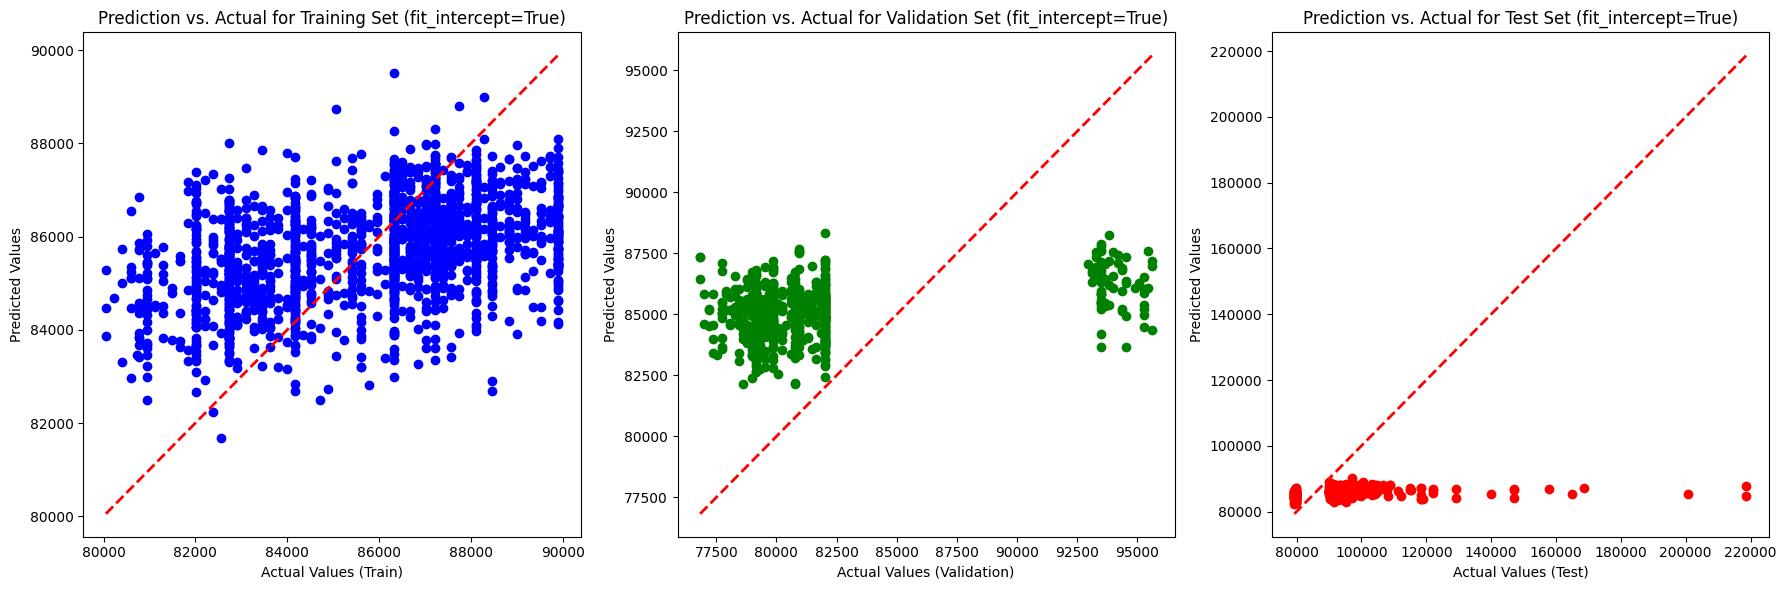

In [ ]:
plt.figure(figsize=(18, 6))

# Prediction vs Actual for Training Set
plt.subplot(1, 3, 1)
plt.scatter(y_train, train_preds, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Values (Train)')
plt.ylabel('Predicted Values')
plt.title('Prediction vs. Actual for Training Set (fit_intercept=True)')

# Prediction vs Actual for Validation Set
plt.subplot(1, 3, 2)
plt.scatter(y_val, val_preds, color='green')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Values (Validation)')
plt.ylabel('Predicted Values')
plt.title('Prediction vs. Actual for Validation Set (fit_intercept=True)')

# Prediction vs Actual for Test Set
plt.subplot(1, 3, 3)
plt.scatter(y_test, test_preds, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Values (Test)')
plt.ylabel('Predicted Values')
plt.title('Prediction vs. Actual for Test Set (fit_intercept=True)')

plt.tight_layout()

> Results: 
* fit_intercept=True: The model with fit_intercept=True shows significantly lower RMSE values across all datasets (training, validation, and test) compared to the model with fit_intercept=False.
* fit_intercept=False: The model with fit_intercept=False demonstrates extremely high RMSE values, indicating poor predictive performance.

<hr>

### E.5 Business Impact from Current Model Performance

In [ ]:
# Define feature list for analysis
features_list = ['10percentage', '12percentage', 'Degree', 'Specialization', 'collegeGPA', 'English', 
                 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 
                 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 
                 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 
                 'GPA_Quant_Interaction', '10_12_Percentage_Interaction', 'GPA_Category']


# Extract feature coefficients
coefficients = pd.DataFrame({
    'Feature': features_list,
    'Coefficient': li.coef_.flatten()
})

# Sort by absolute value of coefficient for better insights
coefficients['Absolute_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the coefficients
print("Feature Coefficients (Impact on Salary Prediction):")
print(coefficients)


Feature Coefficients (Impact on Salary Prediction):
                         Feature  Coefficient  Absolute_Coefficient
7                          Quant   977.825051            977.825051
21         GPA_Quant_Interaction  -657.643519            657.643519
22  10_12_Percentage_Interaction  -643.756318            643.756318
0                   10percentage   627.055039            627.055039
1                   12percentage   534.455239            534.455239
4                     collegeGPA   367.819497            367.819497
5                        English   275.867550            275.867550
11               ComputerScience  -255.422948            255.422948
8                         Domain   188.398509            188.398509
16             conscientiousness  -177.104490            177.104490
23                  GPA_Category  -173.158302            173.158302
9            ComputerProgramming   156.379540            156.379540
20         openess_to_experience  -151.978094            151.978

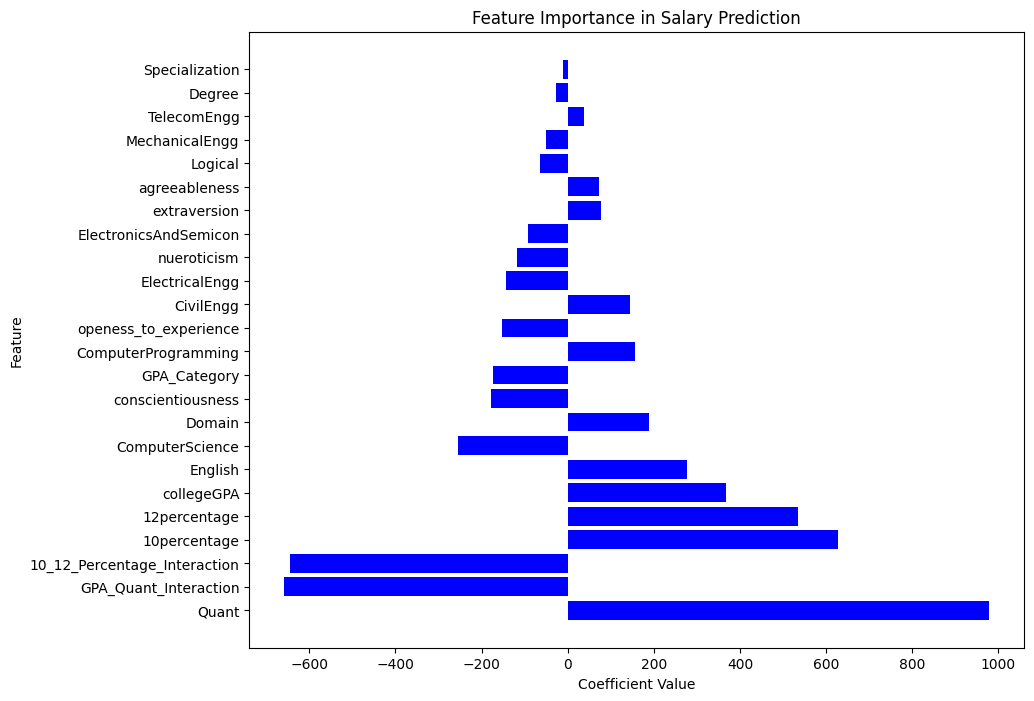

In [ ]:
# Plot the coefficients for a better understanding
plt.figure(figsize=(10, 8))
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color='blue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Salary Prediction')
plt.show()


In [ ]:

# Business Insights based on the feature coefficients
for index, row in coefficients.iterrows():
    feature = row['Feature']
    coef = row['Coefficient']
    
    if coef > 0:
        print(f"Positive Impact: '{feature}' increases the predicted salary. Higher values for '{feature}' correlate with higher salaries.")
    else:
        print(f"Negative Impact: '{feature}' decreases the predicted salary. Higher values for '{feature}' correlate with lower salaries.")

Positive Impact: 'Quant' increases the predicted salary. Higher values for 'Quant' correlate with higher salaries.
Negative Impact: 'GPA_Quant_Interaction' decreases the predicted salary. Higher values for 'GPA_Quant_Interaction' correlate with lower salaries.
Negative Impact: '10_12_Percentage_Interaction' decreases the predicted salary. Higher values for '10_12_Percentage_Interaction' correlate with lower salaries.
Positive Impact: '10percentage' increases the predicted salary. Higher values for '10percentage' correlate with higher salaries.
Positive Impact: '12percentage' increases the predicted salary. Higher values for '12percentage' correlate with higher salaries.
Positive Impact: 'collegeGPA' increases the predicted salary. Higher values for 'collegeGPA' correlate with higher salaries.
Positive Impact: 'English' increases the predicted salary. Higher values for 'English' correlate with higher salaries.
Negative Impact: 'ComputerScience' decreases the predicted salary. Higher val

> Results:  
* Positive Impacts: Features like Quant, 10percentage, 12percentage, collegeGPA, English, ComputerProgramming, CivilEngg, Domain, extraversion, agreeableness, and TelecomEngg increase predicted salaries. This suggests that businesses should prioritize candidates with strong academic performance, technical skills, and interpersonal traits during recruitment.
* Negative Impacts: Features such as GPA_Quant_Interaction, ComputerScience, conscientiousness, ElectricalEngg, MechanicalEngg, and nueroticism decrease predicted salaries. Hiring strategies should be adjusted to focus less on these areas or consider them carefully when offering salaries.
* Business Use Case: Companies should focus on recruiting candidates with strong skills in quantitative reasoning, programming, and domain expertise, while educational institutions should enhance curricula in these areas to improve student salary outcomes.

<hr>

## F. Experiment Outcomes

In [ ]:
final_experiment_outcome = 'Hypothesis Confirmed'

> Key Learnings:  
* Intercept Term Impact: Including the intercept term (fit_intercept=True) significantly improved the model's predictive accuracy, as evidenced by lower RMSE values on the training and validation datasets. This demonstrates that accounting for a baseline value in the model helps in better capturing the underlying patterns in the data.
* Model Performance: The results showed a substantial performance difference between models with and without the intercept term. The model with fit_intercept=True provided more accurate predictions and better generalization to unseen data.

> Recommendations for Next Experiment: 
* Hyperparameter Tuning: Explore additional hyperparameters, such as regularization parameters, to further enhance model performance. Experiment with different values for regularization strength if applicable.
* Model Comparison: Compare the linear regression model with other regression algorithms (e.g., Ridge, Lasso, or non-linear models) to determine if alternative models can provide better accuracy and insights.
* Data Quality Review: Ensure data quality and relevance by reviewing and possibly expanding the dataset, addressing any remaining inconsistencies or missing values, and incorporating additional data if available.

<hr>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=12a1f7ba-c963-4534-995e-794885094f8b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>